In [1]:
%load_ext autoreload
%autoreload 2
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity='all'

In [12]:
import numpy as np
import pandas as pd
from pathlib import Path

# Librosa Libraries
import librosa
import librosa.display
import IPython.display as ipd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import sys
sys.path.append('../easy_gold')

import utils
import datasets
from scipy.ndimage import maximum_filter1d
import noisereduce as nr

In [25]:
def audio_to_spec(audio, sr):
    spec = librosa.power_to_db(
        librosa.feature.melspectrogram(audio, sr=sr, fmin=20, fmax=16000, n_mels=128)
    )
    return spec.astype(np.float32)

def envelope(y, rate, threshold):
    mask = []
    y_mean = maximum_filter1d(np.abs(y), mode="constant", size=rate//20)
#     print(y_mean)
    mask = y_mean > threshold
#     for mean in y_mean:
#         if mean > threshold:
#             mask.append(True)
#         else:
#             mask.append(False)
    return mask, y_mean

In [61]:
# y = np.load('../data/train_resampled_with_nocall_npy/killde/XC109316.npy')
# y = np.load('../data/train_resampled_with_nocall_npy/snogoo/XC350844.npy')
y = np.load('../data/train_resampled_with_nocall_npy/amewig/XC305022.npy')

In [62]:
y

array([-0.1428833 , -0.19906616, -0.03994751, ..., -0.14260864,
       -0.20877075, -0.21954346], dtype=float32)

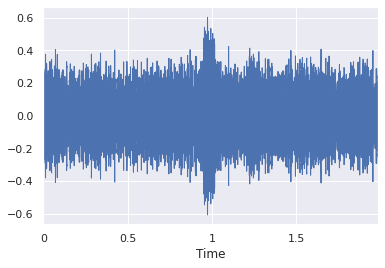

In [63]:
librosa.display.waveplot(y, sr=32000)

In [64]:
ipd.Audio(y,rate=32000)

In [70]:
th = 0.5

In [71]:
mask, env = envelope(y, 32000, th)

[0.3784485  0.3784485  0.3784485  ... 0.29013062 0.29013062 0.29013062]


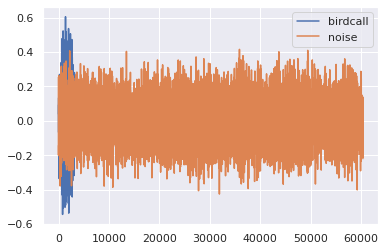

In [72]:
plt.plot(y[mask], label="birdcall")
plt.plot(y[np.logical_not(mask)], label="noise")
plt.legend(bbox_to_anchor=(1, 1), loc='upper right')

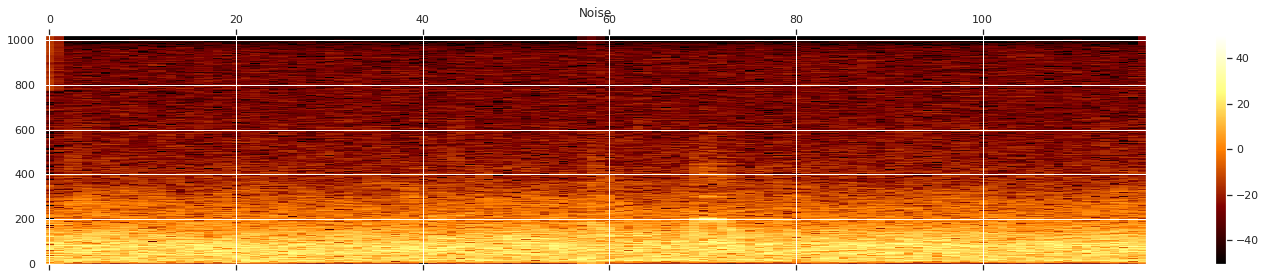

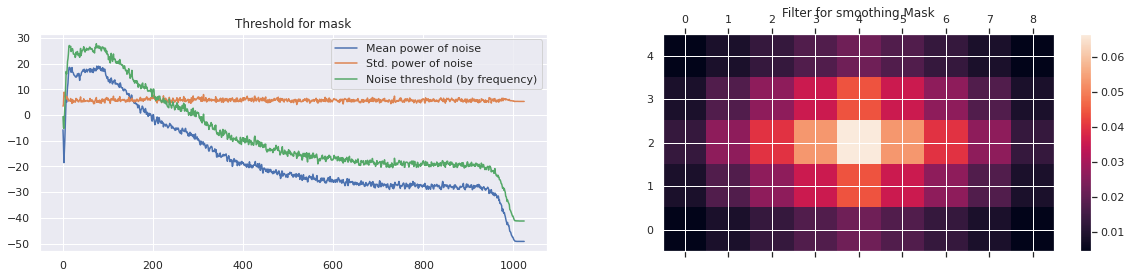

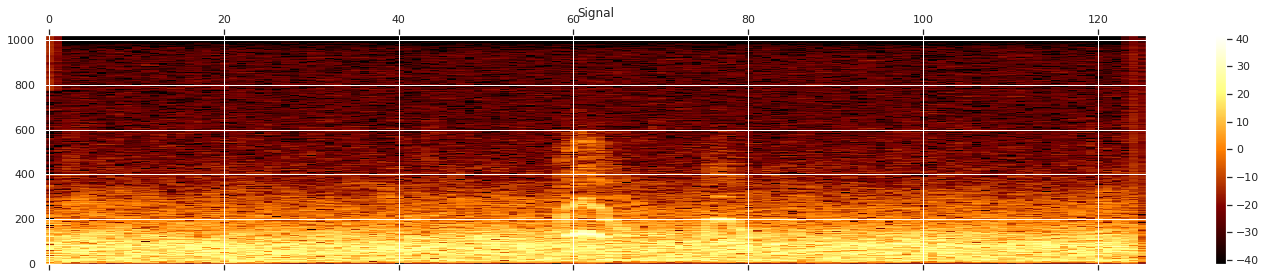

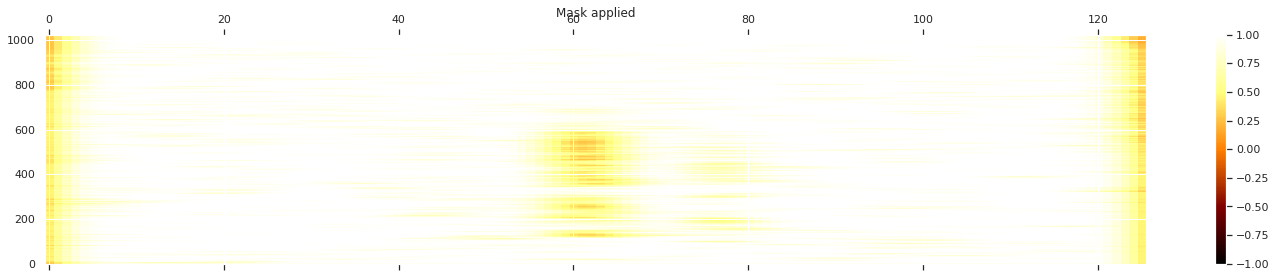

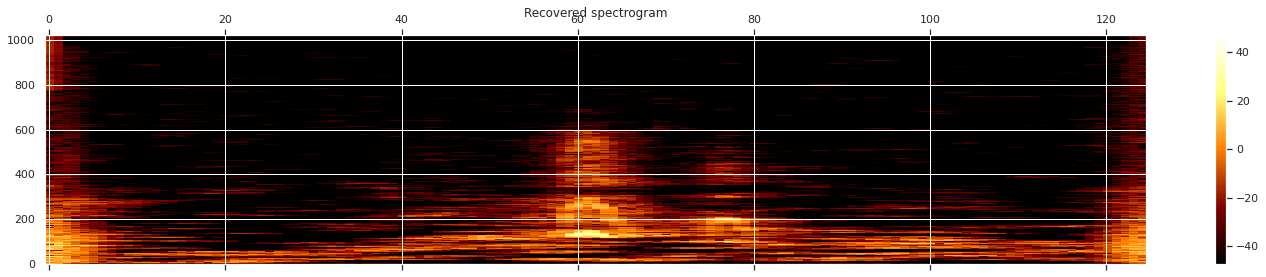

In [73]:
y_denoise = nr.reduce_noise(audio_clip=y, noise_clip=y[np.logical_not(mask)], verbose=True)

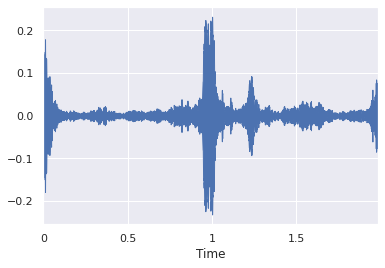

In [74]:
librosa.display.waveplot(y_denoise, sr=32000)

In [75]:
ipd.Audio(y_denoise, rate=32000)